In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Load the ablation dataset
data_path = os.path.join("data", "ablation_studies", "all_results.csv")
data = pd.read_csv(data_path)

Let's start by plotting the evolution of the mean regret with the combinations of u and l for the Levy function.


<Figure size 1500x18000 with 0 Axes>

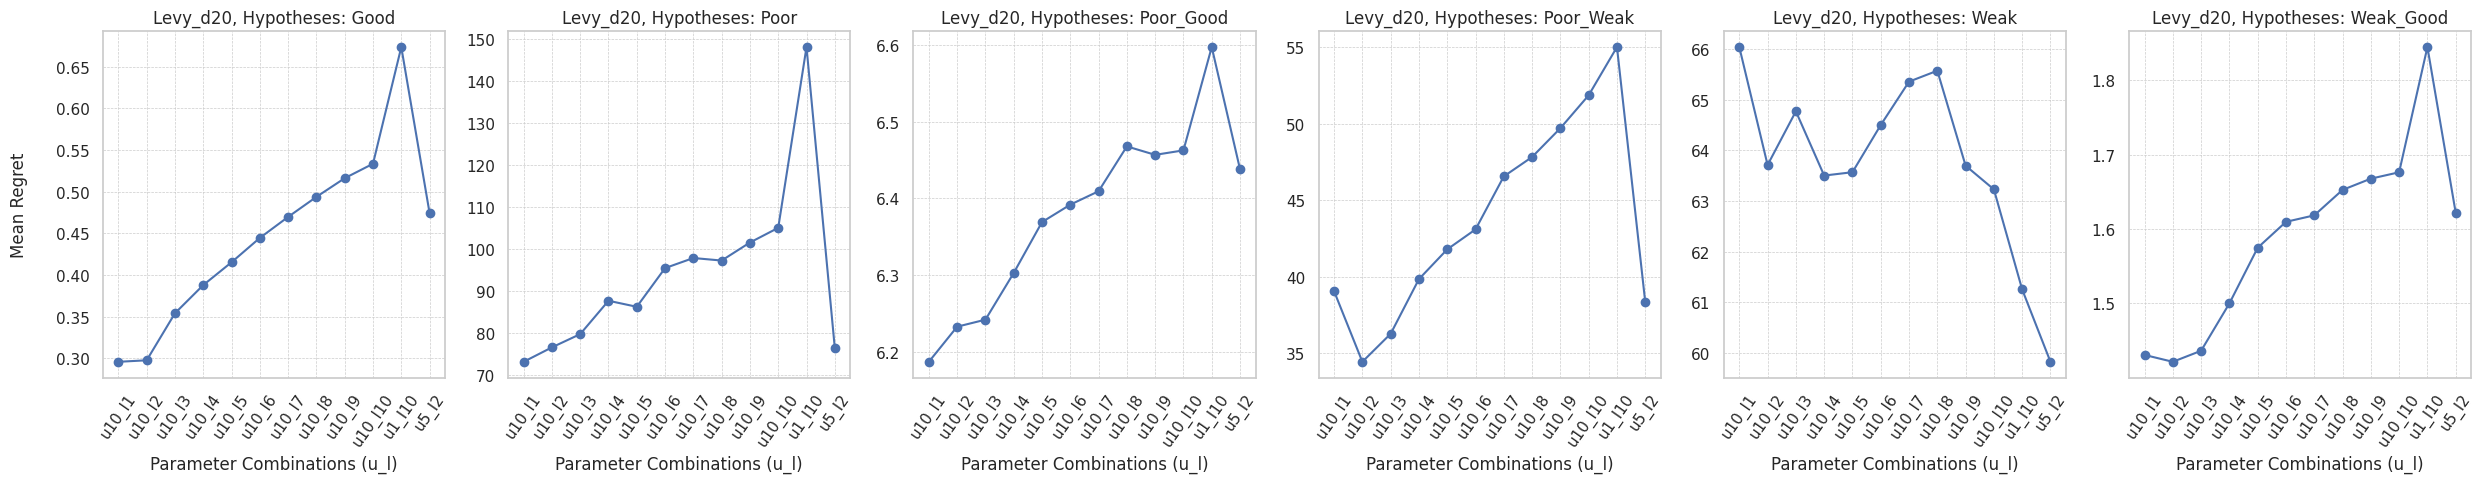

In [30]:
this_data = data.copy()

# Dropping the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    this_data.drop(columns=['Unnamed: 0'], inplace=True)

# Grouping the data by 'Function' and 'Hypotheses'
grouped_data = this_data.groupby(['Function', 'Hypotheses'])

# Calculating the mean for each group
mean_performance = grouped_data.mean().reset_index()

# Setting up the visualization
sns.set(style="whitegrid")
num_plots = len(mean_performance['Function'].unique(
)) * len(mean_performance['Hypotheses'].unique())
plt.figure(figsize=(15, 5 * num_plots))

plot_num = 1

for function in mean_performance['Function'].unique():
    if "Levy" not in function:
        continue
    plt.figure(figsize=(25, 5))
    plot_num = 1
    for hypothesis in mean_performance['Hypotheses'].unique():
        subset = mean_performance[(mean_performance['Function'] == function) &
                                  (mean_performance['Hypotheses'] == hypothesis)]
        if not subset.empty:
            plt.subplot(
                1, len(mean_performance['Hypotheses'].unique()), plot_num)
            plt.title(f"{function}, Hypotheses: {hypothesis}")
            values = subset.values[:, 2:].flatten()
            plt.plot(subset.columns[2:], values, label=subset["Function"])
            # Add scatter dots to the plot
            plt.scatter(subset.columns[2:], values, marker='o')
            plt.xticks(rotation=55)
            plt.xlabel('Parameter Combinations (u_l)')
            if plot_num == 1:
                # Add labelpad to adjust the distance of the label from the y-axis
                plt.ylabel('Mean Regret', labelpad=20)
            # Set grid lines behind the lines
            plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
            plt.tight_layout()
            plot_num += 1

    plt.show()

It seems that there is a trend: increasing l seems to increase the regret as well. Let's see what the trend is when we combine all functions.


/tmp/ipykernel_36045/2738114047.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn_r')  # Define the color map
/tmp/ipykernel_36045/2738114047.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn_r')  # Define the color map
/tmp/ipykernel_36045/2738114047.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlGn_r')  # Define the color map
/tmp/ipykernel_36045/2738114047.py

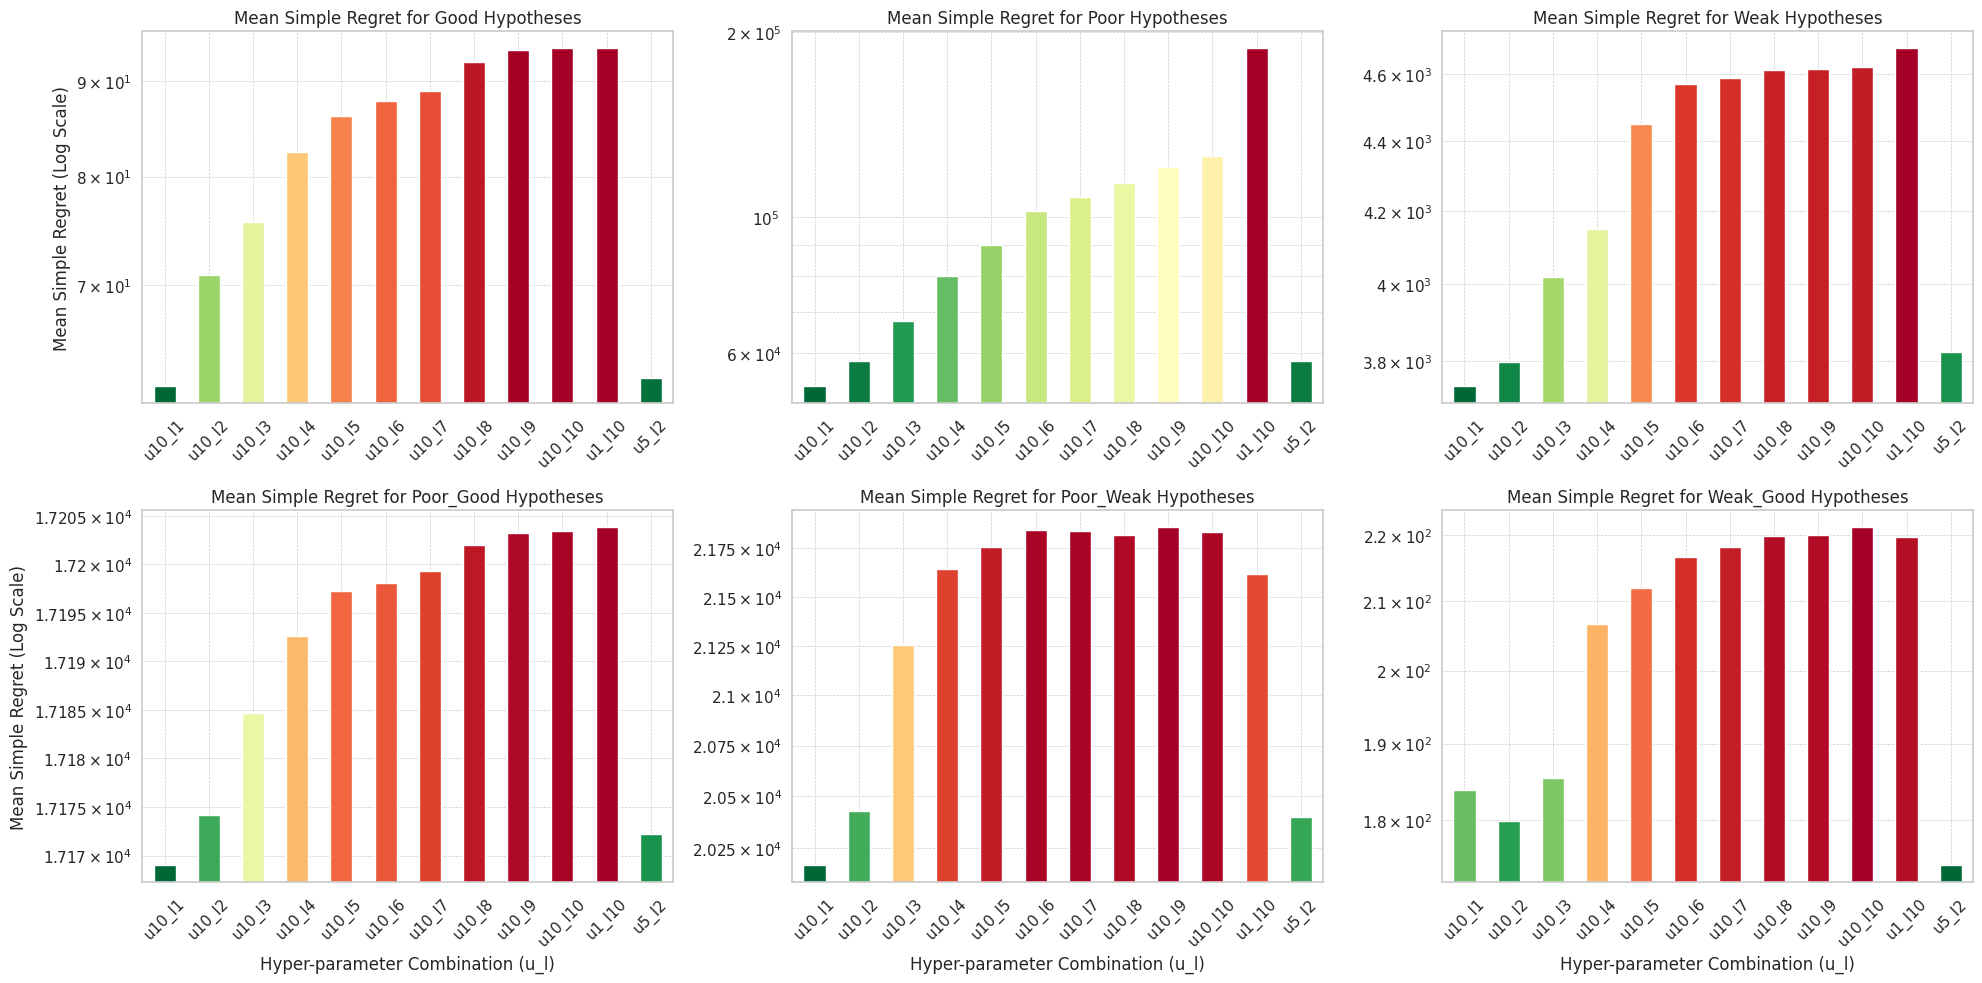

In [31]:
this_data = data.copy()

# Define the hypothesis mixtures
hypothesis_mixtures = ['Good', 'Poor', 'Weak',
                       'Poor_Good', 'Poor_Weak', 'Weak_Good']

# Set up the plot
plt.figure(figsize=(20, 10))
plot_number = 1

for hypothesis in hypothesis_mixtures:
    # Filter data for the current hypothesis
    hypothesis_data = this_data[this_data['Hypotheses'] == hypothesis].drop(
        columns=['Function', 'Hypotheses', 'Unnamed: 0'])

    # Calculate mean regret for each parameter combination
    mean_regret = hypothesis_data.mean()

    # Create a subplot for each hypothesis mixture
    ax = plt.subplot(2, 3, plot_number)

    # Plot the bar chart with the color gradient
    color_map = plt.cm.get_cmap('RdYlGn_r')  # Define the color map
    # Calculate the colors based on the mean regret values
    bar_colors = color_map((mean_regret - mean_regret.min()) /
                           (mean_regret.max() - mean_regret.min()))

    # Plot the bar chart with the colored bars
    mean_regret.plot(kind='bar', ax=ax, color=bar_colors)

    plt.title(f'Mean Simple Regret for {hypothesis} Hypotheses')
    plt.xticks(rotation=45)
    if plot_number >= 4:
        plt.xlabel('Hyper-parameter Combination (u_l)')
    if plot_number == 1 or plot_number == 4:
        plt.ylabel('Mean Simple Regret (Log Scale)')
    ax.set_axisbelow(True)  # Set the grid lines behind the bars
    # Add grid to the plot behind the bars
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_yscale('log')  # Use logarithmic scale for the y-axis
    plot_number += 1

plt.tight_layout()
plt.show()

There is indeed a trend, and u10_l1 seems to be the optimal combination of u and l that minimizes regret. Let's analyze the data by calculating the average regret for each combination of u and l across all trials.


In [33]:
# Load the dataset
this_data = data.copy()

# # Dropping the 'Unnamed: 0' column if it exists
# if 'Unnamed: 0' in data.columns:
#     this_data.drop(columns=['Unnamed: 0'], inplace=True)

# Dropping the first column which is an index
this_data = this_data.drop(this_data.columns[0], axis=1)

# Calculating the mean regret for each combination of u and l
mean_regrets = this_data.drop(['Function', 'Hypotheses'], axis=1).mean()

# Finding the combination with the minimum average regret
optimal_combination = mean_regrets.idxmin()
min_regret = mean_regrets.min()

optimal_combination, min_regret

('u10_l1', 15716.298467373363)

By examining the color gradients and variations across the heatmap, we could assess how changes in u and l impact the performance of HypBO, and thus understand its sensitivity to these parameters. A more uniform color across the heatmap would indicate lower sensitivity, while distinct color variations would suggest higher sensitivity.


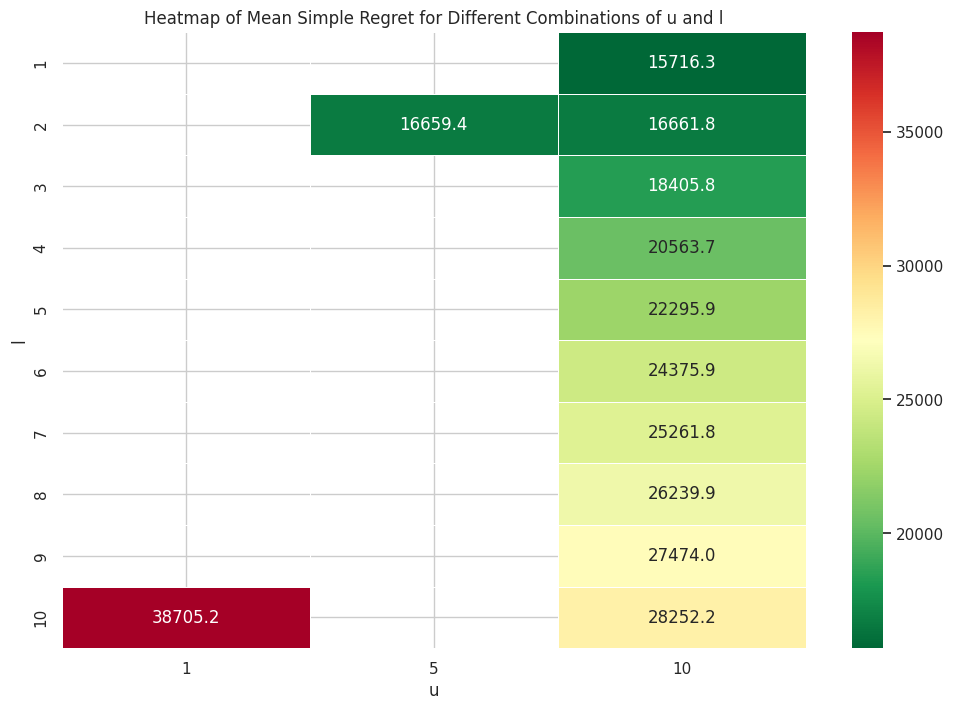

In [34]:
# Extracting u and l values from column names for plotting
u_values = [int(col.split('_')[0][1:]) for col in mean_regrets.index]
l_values = [int(col.split('_')[1][1:]) for col in mean_regrets.index]

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'u': u_values,
    'l': l_values,
    'Mean Regret': mean_regrets.values
})

# Correcting the pivot command to avoid the TypeError
heatmap_data = plot_data.pivot(index='l', columns='u', values='Mean Regret')

# Redrawing the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn_r",
                 linewidths=0.5, linecolor='white')
plt.title("Heatmap of Mean Simple Regret for Different Combinations of u and l")
plt.xlabel("u")
plt.ylabel("l")
plt.show()

Regression Analysis


In [35]:
from sklearn.linear_model import LinearRegression

# Preparing the data for regression analysis
X = plot_data[['u', 'l']]
y = plot_data['Mean Regret']

# Performing linear regression
reg_model = LinearRegression()
reg_model.fit(X, y)

# Coefficients and intercept
intercept = reg_model.intercept_
coefficients = reg_model.coef_

# Preparing the results for display
regression_results = {
    'Intercept': intercept,
    'Coefficient of u': coefficients[0],
    'Coefficient of l': coefficients[1]
}

regression_results

{'Intercept': 20316.930260636345,
 'Coefficient of u': -742.8476330930708,
 'Coefficient of l': 1724.634989595679}

These results suggest that increasing u tends to decrease the mean regret, while increasing l tends to increase the mean regret, under the assumption that the relationship between these parameters and the regret is linear. Keep in mind that this is a simplified model and may not capture more complex relationships or interactions between the parameters.


Let's now analyze and rank the sensitivity of each variant of HypBO to the parameters u and l.


In [36]:
# Subgroup Analysis: Sensitivity for each Hypothesis Mixture
hypothesis_mixtures = data['Hypotheses'].unique()
sensitivity_ranges = {}

for hypothesis in hypothesis_mixtures:
    # Extracting data for each hypothesis mixture
    subset_data = data[data['Hypotheses'] == hypothesis]

    # Calculating mean regrets for each combination of u and l
    mean_regrets_hypothesis = subset_data.drop(
        ['Function', 'Hypotheses'], axis=1).mean()

    # Calculating range of mean regret (max - min) as a measure of sensitivity
    regret_range = mean_regrets_hypothesis.max() - mean_regrets_hypothesis.min()
    sensitivity_ranges[hypothesis] = regret_range

# Ranking the hypothesis mixtures based on their sensitivity ranges
sensitivity_ranking = sorted(
    sensitivity_ranges.items(), key=lambda x: x[1], reverse=True)

sensitivity_ranking

[('Poor', 188365.00496300994),
 ('Poor_Weak', 21807.753289339136),
 ('Poor_Good', 17151.800333391704),
 ('Weak', 4629.045751045098),
 ('Weak_Good', 169.18262412986414),
 ('Good', 41.67120656769123)]

/tmp/ipykernel_36045/202675109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Regret Range', y='Hypothesis Mixture',


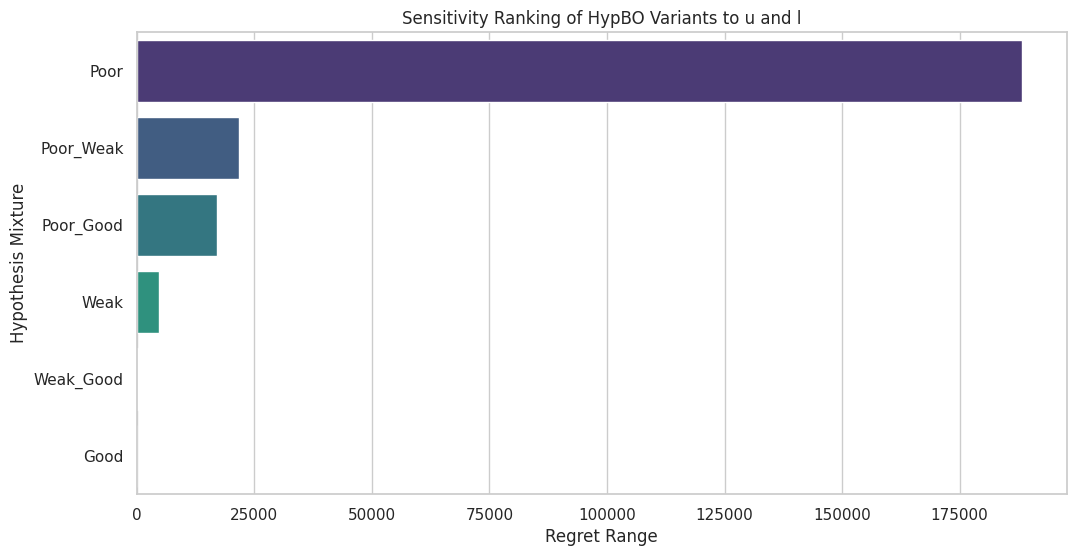

In [37]:
# Converting the sensitivity ranking into a DataFrame for visualization
sensitivity_df = pd.DataFrame(sensitivity_ranking, columns=[
                              'Hypothesis Mixture', 'Regret Range'])

# Creating a bar plot for the sensitivity ranking
plt.figure(figsize=(12, 6))
sns.barplot(x='Regret Range', y='Hypothesis Mixture',
            data=sensitivity_df, palette="viridis")
plt.title('Sensitivity Ranking of HypBO Variants to u and l')
plt.xlabel('Regret Range')
plt.ylabel('Hypothesis Mixture')
plt.show()

/tmp/ipykernel_36045/2559058010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


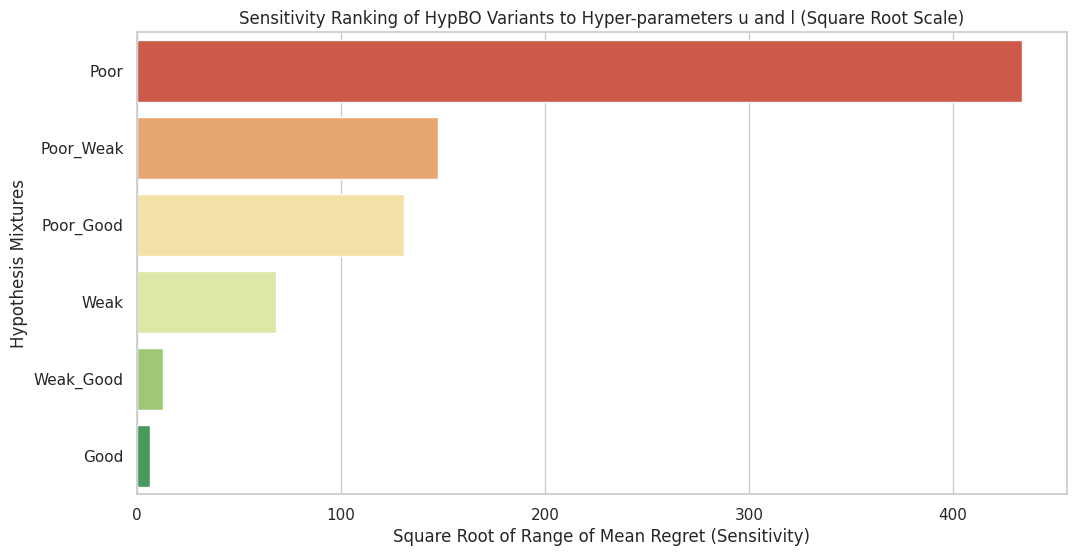

In [38]:
# Adjusting the plot to maintain the differences between high and low sensitivity variants
# We'll use a square root transformation which is less aggressive than the logarithmic scale

plt.figure(figsize=(12, 6))
sns.barplot(
    x=np.sqrt([item[1] for item in sensitivity_ranking]),
    y=[item[0] for item in sensitivity_ranking],
    palette="RdYlGn",
    orient='h')
plt.title(
    'Sensitivity Ranking of HypBO Variants to Hyper-parameters u and l (Square Root Scale)')
plt.xlabel('Square Root of Range of Mean Regret (Sensitivity)')
plt.ylabel('Hypothesis Mixtures')
plt.show()

In [39]:
from scipy.stats import wilcoxon
import itertools

# Calculate the number of pairwise tests
num_tests = len(list(itertools.combinations(hypothesis_mixtures, 2)))

# Adjusted significance level with Bonferroni correction
alpha = 0.05 / num_tests

# Performing Wilcoxon signed-rank tests for each pair of hypothesis mixtures
wilcoxon_results = {}

for pair in itertools.combinations(hypothesis_mixtures, 2):
    # Extracting data for each pair of hypothesis mixtures
    data1 = data[data['Hypotheses'] == pair[0]].drop(
        ['Function', 'Hypotheses'], axis=1)
    data2 = data[data['Hypotheses'] == pair[1]].drop(
        ['Function', 'Hypotheses'], axis=1)

    # Since the Wilcoxon test requires the same number of observations in each sample,
    # we need to make sure that the number of rows in each subset is the same
    min_length = min(len(data1), len(data2))
    data1 = data1.head(min_length)
    data2 = data2.head(min_length)

    # Flatten the data and perform the test
    test_statistic, p_value = wilcoxon(
        data1.values.flatten(), data2.values.flatten())

    # Store the result
    wilcoxon_results[pair] = (test_statistic, p_value, p_value < alpha)

# Displaying the results
wilcoxon_results, alpha

({('Good', 'Poor'): (31251.0, 0.0, True),
  ('Good', 'Poor_Good'): (6632583.0, 3.5877368951395324e-280, True),
  ('Good', 'Poor_Weak'): (154250.0, 0.0, True),
  ('Good', 'Weak'): (4400.0, 0.0, True),
  ('Good', 'Weak_Good'): (5594991.0, 0.0, True),
  ('Poor', 'Poor_Good'): (30245.0, 0.0, True),
  ('Poor', 'Poor_Weak'): (1768425.0, 0.0, True),
  ('Poor', 'Weak'): (4814006.0, 0.0, True),
  ('Poor', 'Weak_Good'): (57407.0, 0.0, True),
  ('Poor_Good', 'Poor_Weak'): (154151.0, 0.0, True),
  ('Poor_Good', 'Weak'): (377244.0, 0.0, True),
  ('Poor_Good', 'Weak_Good'): (10040673.0, 1.9926752272917042e-54, True),
  ('Poor_Weak', 'Weak'): (9847442.0, 6.86612292112222e-98, True),
  ('Poor_Weak', 'Weak_Good'): (195932.0, 0.0, True),
  ('Weak', 'Weak_Good'): (9135.0, 0.0, True)},
 0.0033333333333333335)

Comparing u10_l1 to u5_l2


In [40]:
# Load the dataset
this_data = data.copy()

# Extracting the regrets for the specific combinations from the dataset
regret_u5_l2_updated = this_data['u5_l2']
regret_u10_l1_updated = this_data['u10_l1']

# Performing the Wilcoxon signed-rank test
# Making sure that the number of observations in each sample is the same
min_length_updated = min(len(regret_u5_l2_updated), len(regret_u10_l1_updated))
test_statistic_updated, p_value_updated = wilcoxon(regret_u5_l2_updated.head(
    min_length_updated), regret_u10_l1_updated.head(min_length_updated))

test_statistic_updated, p_value_updated

(1674299.0, 3.7545911660411175e-171)

The extremely low p-value indicates that there is a statistically significant difference in regrets between the two combinations. This suggests that the performance (as measured by regret) of the combination u=10, l=1 is significantly different from that of your default combination u=5, l=2. Given the context of seeking to minimize regret, this result supports the idea that u=10, l=1 is a more effective combination than u=5, l=2 in the scenarios tested in our study. ​​


/tmp/ipykernel_36045/1784075385.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_mean_regrets.index,


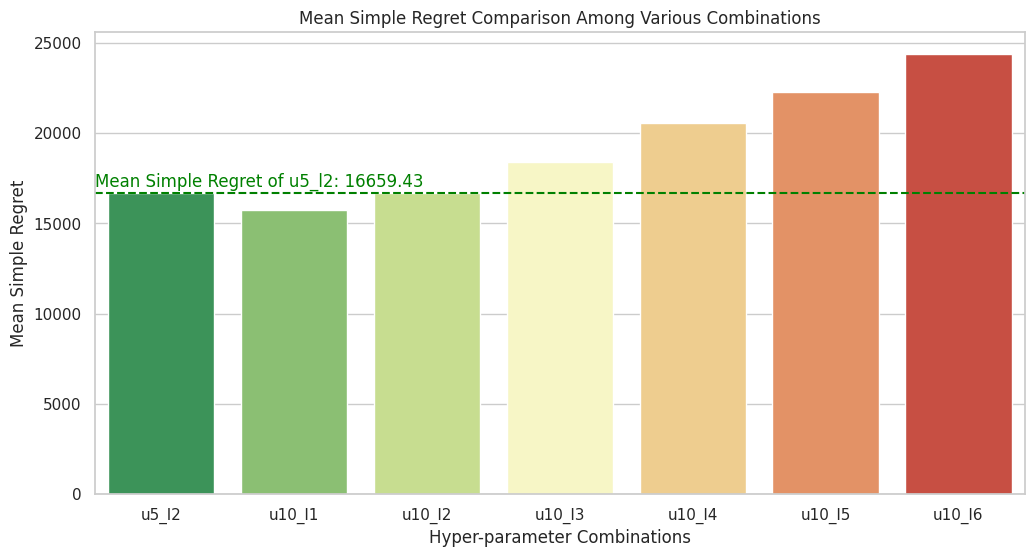

(16659.431368416965, 15716.298467373363)

In [61]:
# Calculating the mean regret for u5_l2 and other combinations
mean_regrets_updated = data.drop(
    ['Function', 'Hypotheses', 'Unnamed: 0'], axis=1).mean()
mean_regret_u5_l2 = mean_regrets_updated['u5_l2']
mean_regret_u10_l1 = mean_regrets_updated['u10_l1']

# Preparing data for a comparative bar plot
mean_regrets_comparative = mean_regrets_updated.sort_values(ascending=False)
selected_combinations = ['u5_l2', 'u10_l1'] + \
    list(mean_regrets_comparative.index[5:])[::-1]
selected_mean_regrets = mean_regrets_comparative[selected_combinations]

# Creating a bar plot for visual comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_mean_regrets.index,
            y=selected_mean_regrets.values, palette="RdYlGn_r")
plt.title('Mean Simple Regret Comparison Among Various Combinations')
plt.xlabel('Hyper-parameter Combinations')
plt.ylabel('Mean Simple Regret')
plt.axhline(mean_regret_u5_l2, color='green', linestyle='--')
plt.text(-0.5, mean_regret_u5_l2+150,
         f'Mean Simple Regret of u5_l2: {mean_regret_u5_l2:.2f}',
         color='green', va='bottom', ha='left')
plt.show()

mean_regret_u5_l2, mean_regret_u10_l1